In [21]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob as glob
from copy import copy

target_root_id = 100741

In [22]:
!head -n 1 catalog/out_004.list

#ID DescID M200b Vmax Vrms R200b Rs Np X Y Z VX VY VZ JX JY JZ Spin rs_klypin M200b_all Mvir M200c M500c M180b Xoff Voff spin_bullock b_to_a c_to_a A[x] A[y] A[z] b_to_a(500c) c_to_a(500c) A[x](500c) A[y](500c) A[z](500c) T/|U| M_pe_Behroozi M_pe_Diemer Type SM Gas BH_Mass m200b_hires m200b_lowres


In [23]:
out_lists = glob('catalog/out_*.list')
out_lists.sort()

out_lists = out_lists[::-1]

In [24]:
def find_prog_index_id(prev_catalog, my_id):
    prev_desc_ids = prev_catalog['desc_id']
    progs = np.where(prev_desc_ids==my_id)[0]
    if not progs.size:
        return -1, -1
    
    if progs.size == 1:
        return progs[0], prev_catalog['id'][progs[0]]
    else:
        prog_vmax = prev_catalog['vmax'][progs]
        index = progs[np.argmax(prog_vmax)]
        assert prog_vmax.max() == prev_catalog['vmax'][index]
        return index, prev_catalog['id'][index]
    

outlist_ext, actual_mb_id, actual_mb_vmax, actual_mb_mass = [], [], [], []

In [25]:
catalog = np.loadtxt(out_lists[0], usecols=[0, 1, 2, 3], # halo_id, desc_id, mass, vmax
             dtype=[('id', int), ('desc_id', int), ('mass', float), ('vmax', float)])  


loc = catalog['id'] == target_root_id
assert np.count_nonzero(loc) == 1

outlist_ext.append(int(out_lists[0].split('_')[-1].split('.')[0]))

index = np.where(loc)[0][0]
actual_mb_id.append(catalog['id'][index])
actual_mb_vmax.append(catalog['vmax'][index])
actual_mb_mass.append(catalog['mass'][index])
my_id = catalog['id'][index]

loader_index = 1
prev_catalog = np.loadtxt(out_lists[loader_index], usecols=[0, 1, 2, 3], # halo_id, desc_id, mass, vmax
             dtype=[('id', int), ('desc_id', int), ('mass', float), ('vmax', float)])  

prog_index, prog_id = find_prog_index_id(prev_catalog, my_id)

while prog_id >= 0:
    catalog = copy(prev_catalog)
    index = copy(prog_index)
    
    outlist_ext.append(int(out_lists[loader_index].split('_')[-1].split('.')[0]))
    actual_mb_id.append(catalog['id'][index])
    actual_mb_vmax.append(catalog['vmax'][index])
    actual_mb_mass.append(catalog['mass'][index])
    my_id = catalog['id'][prog_index]
    
    loader_index += 1
    prev_catalog = np.loadtxt(out_lists[loader_index], usecols=[0, 1, 2, 3], # halo_id, desc_id, mass, vmax
                 dtype=[('id', int), ('desc_id', int), ('mass', float), ('vmax', float)])  
    print("loaded {}".format(out_lists[loader_index]))
    
    prog_index, prog_id = find_prog_index_id(prev_catalog, my_id)

loaded catalog/out_598.list
loaded catalog/out_597.list
loaded catalog/out_596.list
loaded catalog/out_595.list
loaded catalog/out_594.list
loaded catalog/out_593.list
loaded catalog/out_592.list
loaded catalog/out_591.list
loaded catalog/out_590.list
loaded catalog/out_589.list
loaded catalog/out_588.list
loaded catalog/out_587.list
loaded catalog/out_586.list
loaded catalog/out_585.list
loaded catalog/out_584.list
loaded catalog/out_583.list
loaded catalog/out_582.list
loaded catalog/out_581.list
loaded catalog/out_580.list
loaded catalog/out_579.list
loaded catalog/out_578.list
loaded catalog/out_577.list
loaded catalog/out_576.list
loaded catalog/out_575.list
loaded catalog/out_574.list
loaded catalog/out_573.list
loaded catalog/out_572.list
loaded catalog/out_571.list
loaded catalog/out_570.list
loaded catalog/out_569.list
loaded catalog/out_568.list
loaded catalog/out_567.list
loaded catalog/out_566.list
loaded catalog/out_565.list
loaded catalog/out_564.list
loaded catalog/out_5

loaded catalog/out_305.list
loaded catalog/out_304.list
loaded catalog/out_303.list
loaded catalog/out_302.list
loaded catalog/out_301.list
loaded catalog/out_300.list
loaded catalog/out_299.list
loaded catalog/out_298.list
loaded catalog/out_297.list
loaded catalog/out_296.list
loaded catalog/out_295.list
loaded catalog/out_294.list
loaded catalog/out_293.list
loaded catalog/out_292.list
loaded catalog/out_291.list
loaded catalog/out_290.list
loaded catalog/out_289.list
loaded catalog/out_288.list
loaded catalog/out_287.list
loaded catalog/out_286.list
loaded catalog/out_285.list
loaded catalog/out_284.list
loaded catalog/out_283.list
loaded catalog/out_282.list
loaded catalog/out_281.list
loaded catalog/out_280.list
loaded catalog/out_279.list
loaded catalog/out_278.list
loaded catalog/out_277.list
loaded catalog/out_276.list
loaded catalog/out_275.list
loaded catalog/out_274.list
loaded catalog/out_273.list
loaded catalog/out_272.list
loaded catalog/out_271.list
loaded catalog/out_2

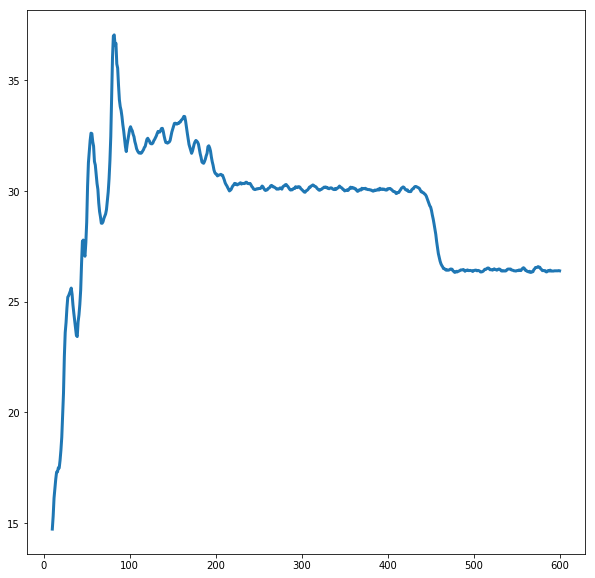

In [28]:
plt.figure(figsize=(10,10))
plt.plot(outlist_ext, actual_mb_vmax, lw=3)

(10, 100)

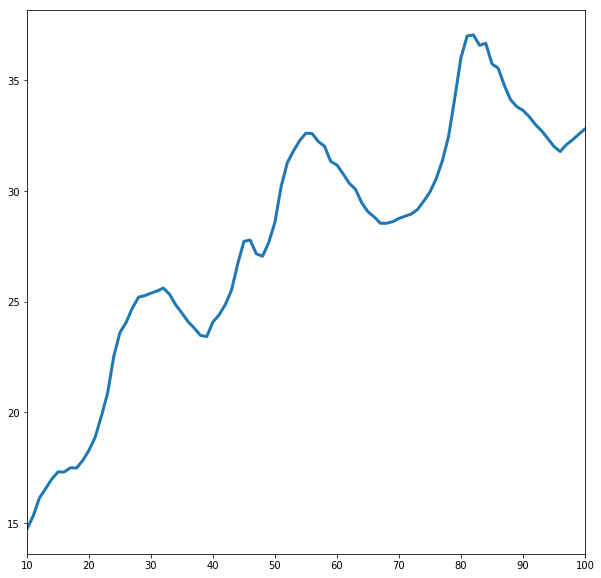

In [29]:
plt.figure(figsize=(10,10))
plt.plot(outlist_ext, actual_mb_vmax, lw=3)
plt.xlim(10, 100)

In [60]:
print(out_lists[-1])
print(out_lists[0])
print(len(out_lists))

catalog/out_000.list
catalog/out_600.list
601


In [62]:
!cat catalog/out_000.list
!echo
!wc -l catalog/out_000.list
!wc -l catalog/out_001.list

#ID DescID M200b Vmax Vrms R200b Rs Np X Y Z VX VY VZ JX JY JZ Spin rs_klypin M200b_all Mvir M200c M500c M180b Xoff Voff spin_bullock b_to_a c_to_a A[x] A[y] A[z] b_to_a(500c) c_to_a(500c) A[x](500c) A[y](500c) A[z](500c) T/|U| M_pe_Behroozi M_pe_Diemer Type SM Gas BH_Mass m200b_hires m200b_lowres
#a = 0.050000
#Om = 0.310000; Ol = 0.690000; h = 0.680000
#FOF linking length: 0.280000
#Unbound Threshold: 0.100000; FOF Refinement Threshold: 0.700000
#Particle mass: 1.30761e+04 Msun/h
#Box size: 92.480003 Mpc/h
#Force resolution assumed: 0.007 Mpc/h
#Units: Masses in Msun / h
#Units: Positions in Mpc / h (comoving)
#Units: Velocities in km / s (physical, peculiar)
#Units: Halo Distances, Lengths, and Radii in kpc / h (comoving)
#Units: Angular Momenta in (Msun/h) * (Mpc/h) * km/s (physical)
#Units: Spins are dimensionless
#Np is an internal debugging quantity.
#Rockstar-Galaxies Version: 0.99.9-RC3-newA

16 catalog/out_000.list
28 catalog/out_001.list


In [63]:
outdir = 'grepped_v2/offset_1/'
if not os.path.isdir(outdir):
    os.makedirs(outdir)

# there are no halos in out_000.list (but there are in out_001.list), so let's try subtracting 1 from all of them
outlist_offset = 1

for ii in range(len(outlist_ext)):
    cat_num = outlist_ext[ii]
    
    files = glob('catalog/outputs/*log*_{}.*'.format(cat_num - outlist_offset))
    for fn in files:
        outfn = outdir+fn.split('/')[-1] + '-id-{}'.format(actual_mb_id[ii])
        os.system('grep "{}" {} > {}'.format(actual_mb_id[ii], fn, outfn))

In [64]:
!wc -l grepped_v2/offset_1/* | tail -n 1

  28322 total


In [65]:
outdir = 'grepped_v2/offset_0/'
if not os.path.isdir(outdir):
    os.makedirs(outdir)

# there are no halos in out_000.list... but it does exist, so let's try not subtracting anything
outlist_offset = 0

for ii in range(len(outlist_ext)):
    cat_num = outlist_ext[ii]
    
    files = glob('catalog/outputs/*log*_{}.*'.format(cat_num - outlist_offset))
    for fn in files:
        outfn = outdir+fn.split('/')[-1] + '-id-{}'.format(actual_mb_id[ii])
        os.system('grep "{}" {} > {}'.format(actual_mb_id[ii], fn, outfn))

In [66]:
!wc -l grepped_v2/offset_0/* | tail -n 1

  28303 total


In [68]:
print(outlist_ext)

[600, 599, 598, 597, 596, 595, 594, 593, 592, 591, 590, 589, 588, 587, 586, 585, 584, 583, 582, 581, 580, 579, 578, 577, 576, 575, 574, 573, 572, 571, 570, 569, 568, 567, 566, 565, 564, 563, 562, 561, 560, 559, 558, 557, 556, 555, 554, 553, 552, 551, 550, 549, 548, 547, 546, 545, 544, 543, 542, 541, 540, 539, 538, 537, 536, 535, 534, 533, 532, 531, 530, 529, 528, 527, 526, 525, 524, 523, 522, 521, 520, 519, 518, 517, 516, 515, 514, 513, 512, 511, 510, 509, 508, 507, 506, 505, 504, 503, 502, 501, 500, 499, 498, 497, 496, 495, 494, 493, 492, 491, 490, 489, 488, 487, 486, 485, 484, 483, 482, 481, 480, 479, 478, 477, 476, 475, 474, 473, 472, 471, 470, 469, 468, 467, 466, 465, 464, 463, 462, 461, 460, 459, 458, 457, 456, 455, 454, 453, 452, 451, 450, 449, 448, 447, 446, 445, 444, 443, 442, 441, 440, 439, 438, 437, 436, 435, 434, 433, 432, 431, 430, 429, 428, 427, 426, 425, 424, 423, 422, 421, 420, 419, 418, 417, 416, 415, 414, 413, 412, 411, 410, 409, 408, 407, 406, 405, 404, 403, 402, 401,

In [69]:
print(actual_mb_id)

[100741, 101798, 101976, 101914, 101954, 101862, 101903, 101832, 101794, 101947, 102003, 102020, 101995, 100824, 101171, 100884, 100814, 102599, 101081, 102389, 102413, 102026, 102136, 101262, 102249, 100743, 102715, 102200, 101170, 101790, 103177, 102995, 103017, 102724, 101445, 101205, 100972, 101516, 101340, 101366, 101465, 101590, 101464, 101891, 101965, 102084, 102190, 102065, 102264, 102262, 102362, 102265, 102370, 102198, 102519, 102504, 102432, 102610, 102964, 103044, 102991, 102998, 103123, 103435, 103417, 103363, 103732, 103441, 103492, 103659, 103852, 103599, 103724, 103874, 64587, 104072, 64758, 64570, 64795, 64748, 64933, 2110, 2100, 64785, 64464, 64618, 65159, 104707, 64881, 103036, 104659, 104856, 65132, 1885, 2187, 64391, 65730, 65174, 105284, 65193, 1757, 104386, 105767, 105496, 64778, 64608, 64852, 64994, 65101, 65300, 65449, 1272, 1523, 104941, 65184, 65342, 65281, 1757, 1097, 1481, 65316, 65282, 65445, 1570, 65240, 1613, 65477, 106023, 105748, 1680, 1560, 65776, 658

In [71]:
print(dict(zip(outlist_ext, actual_mb_id)))

{600: 100741, 599: 101798, 598: 101976, 597: 101914, 596: 101954, 595: 101862, 594: 101903, 593: 101832, 592: 101794, 591: 101947, 590: 102003, 589: 102020, 588: 101995, 587: 100824, 586: 101171, 585: 100884, 584: 100814, 583: 102599, 582: 101081, 581: 102389, 580: 102413, 579: 102026, 578: 102136, 577: 101262, 576: 102249, 575: 100743, 574: 102715, 573: 102200, 572: 101170, 571: 101790, 570: 103177, 569: 102995, 568: 103017, 567: 102724, 566: 101445, 565: 101205, 564: 100972, 563: 101516, 562: 101340, 561: 101366, 560: 101465, 559: 101590, 558: 101464, 557: 101891, 556: 101965, 555: 102084, 554: 102190, 553: 102065, 552: 102264, 551: 102262, 550: 102362, 549: 102265, 548: 102370, 547: 102198, 546: 102519, 545: 102504, 544: 102432, 543: 102610, 542: 102964, 541: 103044, 540: 102991, 539: 102998, 538: 103123, 537: 103435, 536: 103417, 535: 103363, 534: 103732, 533: 103441, 532: 103492, 531: 103659, 530: 103852, 529: 103599, 528: 103724, 527: 103874, 526: 64587, 525: 104072, 524: 64758, 